In [1]:
import numpy as np
import random

my_array = np.array

In [2]:
#Unvaccinated in Texas 62% not fully vaccinated
class Person(object):
    def __init__(self):
    
        self.status = "Susceptible"
        self.days_sick = 0
        self.sickness_rate = 5
        #self.sickness_rate = 5(vaccinated)
        self.Interaction = []
    
    def set_sickness_rate(self, new_rate):
        self.sickness_rate = new_rate
    
    def infect(self, number_of_days_sick):
        self.status = "Infected"
        self.days_sick = number_of_days_sick
    
    def recover(self):
        self.status = "Recovered"
        self.days_sick = 0
    
    def update(self):
        if (self.status == "Susceptible"):
            self.roll_for_infection()
            
        elif (self.status == "Infected"):            
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()
    
    def update_days_sick(self):
        if (self.status == "Infected"):            
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()
            

            
    def roll_for_infection(self):
        is_sick = (random.randint(0,101) < self.sickness_rate)
        if (is_sick):
            self.infect(4)

In [3]:
Joe = Person()
Jane = Person()
Jane.set_sickness_rate(10) #jane has a different sickness rate, joe has the default

day = 0

while (Joe.status != "Recovered" or Jane.status != "Recovered"):
    day = day + 1        
    Joe.update()
    if (Joe.status == "Infected" or Jane.status == "Infected"):
        Jane.update()
        
        
    print("Joe is " + Joe.status + " day:" + str(day))
    print("Jane is " + Jane.status + " day:" + str(day))
    
    #My conditions didn't happen, let's rerun
    #if Joe is recovered and Jane is still susceptable, the condtions for our program weren't met
    #run it again!
    if (Joe.status == "Recovered" and Jane.status == "Susceptible"):
        Joe.status = "Susceptible"
        day = 0
        print()
        print ("------- reset -------")

Joe is Susceptible day:1
Jane is Susceptible day:1
Joe is Susceptible day:2
Jane is Susceptible day:2
Joe is Susceptible day:3
Jane is Susceptible day:3
Joe is Susceptible day:4
Jane is Susceptible day:4
Joe is Susceptible day:5
Jane is Susceptible day:5
Joe is Susceptible day:6
Jane is Susceptible day:6
Joe is Susceptible day:7
Jane is Susceptible day:7
Joe is Susceptible day:8
Jane is Susceptible day:8
Joe is Susceptible day:9
Jane is Susceptible day:9
Joe is Susceptible day:10
Jane is Susceptible day:10
Joe is Susceptible day:11
Jane is Susceptible day:11
Joe is Susceptible day:12
Jane is Susceptible day:12
Joe is Susceptible day:13
Jane is Susceptible day:13
Joe is Susceptible day:14
Jane is Susceptible day:14
Joe is Susceptible day:15
Jane is Susceptible day:15
Joe is Susceptible day:16
Jane is Susceptible day:16
Joe is Susceptible day:17
Jane is Susceptible day:17
Joe is Susceptible day:18
Jane is Susceptible day:18
Joe is Susceptible day:19
Jane is Susceptible day:19
Joe is Susc

In [4]:
my_population = []
n = 101
for i in range(0,n):
    generic_dude = Person()
    my_population.append(generic_dude) # we now have a population of 100 people

In [5]:
interactions = []
index = -1
for p in my_population:
    p_interactions = []
    for i in range(0,10):
        r = random.randint(0,100)
        p_interactions.append(r)
    interactions.append(p_interactions)

for i in interactions:
    index = index + 1
    print ("Person:", index, " interacted with:", i)

Person: 0  interacted with: [50, 84, 95, 54, 92, 57, 79, 27, 82, 43]
Person: 1  interacted with: [1, 57, 11, 25, 31, 27, 41, 23, 29, 13]
Person: 2  interacted with: [91, 64, 21, 92, 82, 68, 78, 93, 52, 26]
Person: 3  interacted with: [8, 32, 69, 40, 20, 42, 58, 73, 32, 98]
Person: 4  interacted with: [58, 26, 41, 17, 43, 90, 90, 56, 89, 36]
Person: 5  interacted with: [43, 27, 100, 61, 74, 50, 25, 63, 61, 96]
Person: 6  interacted with: [13, 75, 4, 25, 16, 19, 96, 98, 59, 45]
Person: 7  interacted with: [43, 97, 88, 64, 18, 9, 77, 75, 86, 73]
Person: 8  interacted with: [45, 1, 68, 80, 49, 84, 66, 90, 43, 65]
Person: 9  interacted with: [21, 4, 8, 9, 28, 57, 88, 13, 74, 3]
Person: 10  interacted with: [16, 70, 100, 71, 59, 65, 63, 13, 34, 80]
Person: 11  interacted with: [73, 28, 70, 62, 32, 9, 4, 8, 40, 3]
Person: 12  interacted with: [25, 25, 9, 53, 24, 69, 99, 97, 57, 6]
Person: 13  interacted with: [77, 90, 35, 79, 94, 63, 22, 14, 97, 33]
Person: 14  interacted with: [49, 51, 6, 60

In [6]:
#first thing: infect 10 people

#print out the number of people who are sick

#look at their interaction lists

#If anyone interacts with them, see if they get sick

In [7]:
# We're selecting 10 indexes of people we're going to infect
currently_infected = random.sample(range(100), 10)

for i in currently_infected:
    my_population[i].infect(5)


print ("Day 1, number of people sick:" + str(len(currently_infected)))
print (currently_infected)

interactions = []
person_index = -1
for p in my_population:
    person_index = person_index + 1

    # if person_index is in the currently_sick list, everyone they interact w/ can get sick
    
    p_interactions = []
    for i in range(0,10):        
        r = random.randint(0,99)
        p_interactions.append(r)

        #If person_index is already sick, everyone they contact, might also get sick
        
        if (person_index in currently_infected):
            my_population[r].update()
            if (my_population[r].status == "Infected" and r not in currently_infected):
                currently_infected.append(r)
        #If anyone has an infected person in their interactions list, *they* might get infected
        if (r in currently_infected):
            my_population[person_index].update()
            if (my_population[person_index].status == "Infected" and person_index not in currently_infected):
                currently_infected.append(person_index)
    interactions.append(p_interactions)
        
        
# person_index = -1
# for i in interactions:
#     person_index = person_index + 1
#     print ("Person:", person_index, " interacted with:", i)

print ("End of Day 1, number of people sick:", len(currently_infected))
print (currently_infected)

Day 1, number of people sick:10
[71, 13, 80, 26, 24, 11, 27, 89, 86, 10]
End of Day 1, number of people sick: 24
[71, 13, 80, 26, 24, 11, 27, 89, 86, 10, 97, 16, 21, 25, 28, 68, 87, 48, 63, 31, 75, 47, 98, 54]


In [8]:
class Population:
    def __init__(self, number=100, interaction=10):
        self.People = []
        self.number = number
        self.interaction = interaction
        
        if (number < 100):
            self.number = 100
        
        if (interaction < 10):
            self.interaction = 10
        
        ##build our population
        patient_Zero = Person()
        patient_Zero.infect(5)
        
        self.People.append(patient_Zero)
        
        for i in range(0,number):
            p = Person()
            self.People.append(p)
            
    def number_of_sick(self):
        sick_Count = 0
        for j in self.People:
            if (j.status == "Infected"):
                sick_Count = sick_Count + 1
                
        return sick_Count
    
    def number_of_recovered(self):
        recovered_Count = 0
        for j in self.People:
            if (j.status == "Recovered"):
                recovered_Count = recovered_Count + 1
        
        return recovered_Count
    
    def number_of_susceptible(self):
        susceptible_Count = 0
        for j in self.People:
            if (j.status == "Susceptible"):
                susceptible_Count = susceptible_Count + 1
                
        return susceptible_Count
    
    ## Here's the brains of the Population class (and our code)
    ## the update will be ran everyday (meaning, every iteration of our while loop)
    ## build interaction tables (who interacted with whom)
    ## if marked sick they must roll to see if (one per interaction)
    ## if I interacted with 10 people, each of them must roll and vice versa if they
    ## they were marked as infected
    def update(self):
        ## people who are might get sick
        might_Get_Sick = []
        
        for person in self.People:
            
            #clear out your interactions per day
            person.Interaction = []
            
            ##These are the n number of people that you interact with
            for i in range(0, self.interaction):
                r = random.randint(0,self.number)
                person.Interaction.append(r)
                
            ##if "person" is Infected, every single person they interacted with might get sick
            if (person.status == "Infected"):
                person.update_days_sick()
                
                for m in person.Interaction:
                    if (self.People[m].status == "Susceptible"): #only susceptible people can get sick
                        might_Get_Sick.append(self.People[m])
            
            ##if "person" is susceptible and they interact w/ someone who is "infected" 
            ##person gets added to the "might get sick"
            if (person.status == "Susceptible"):
                for m in person.Interaction:
                    if (self.People[m].status == "Infected"):
                        might_Get_Sick.append(person)
            
        ##Now! We're going to roll through our "Might Get Sick" and they each roll a die
        ##this is only a list of susceptible people
        for p in might_Get_Sick:
            p.roll_for_infection()

In [9]:
myCommunity = Population(6200,5)
day = 0
my_plot = []
number_sick = myCommunity.number_of_sick()
while (number_sick > 0):
    number_sick = myCommunity.number_of_sick()
    number_recovered = myCommunity.number_of_recovered()
    my_plot.append([day, number_sick, number_recovered])
    print ("day:", day, "Number of sick:", number_sick)

    day = day+1
    myCommunity.update()

#print ("day:", day, "Number of sick:", myCommunity.number_of_sick())
print ("Number recovered:", myCommunity.number_of_recovered())
print ("Number susceptible:", myCommunity.number_of_susceptible())

print (my_plot)

day: 0 Number of sick: 1
day: 1 Number of sick: 1
day: 2 Number of sick: 1
day: 3 Number of sick: 2
day: 4 Number of sick: 6
day: 5 Number of sick: 12
day: 6 Number of sick: 26
day: 7 Number of sick: 47
day: 8 Number of sick: 86
day: 9 Number of sick: 164
day: 10 Number of sick: 303
day: 11 Number of sick: 564
day: 12 Number of sick: 971
day: 13 Number of sick: 1601
day: 14 Number of sick: 2393
day: 15 Number of sick: 3130
day: 16 Number of sick: 3615
day: 17 Number of sick: 3537
day: 18 Number of sick: 2968
day: 19 Number of sick: 2118
day: 20 Number of sick: 1266
day: 21 Number of sick: 669
day: 22 Number of sick: 315
day: 23 Number of sick: 152
day: 24 Number of sick: 75
day: 25 Number of sick: 37
day: 26 Number of sick: 16
day: 27 Number of sick: 11
day: 28 Number of sick: 6
day: 29 Number of sick: 4
day: 30 Number of sick: 3
day: 31 Number of sick: 1
day: 32 Number of sick: 0
Number recovered: 6025
Number susceptible: 176
[[0, 1, 0], [1, 1, 0], [2, 1, 0], [3, 2, 0], [4, 6, 0], [5,

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.DataFrame(my_plot, columns=['day','number_sick', 'number_recovered'])

In [12]:
df

,day,number_sick,number_recovered
0,0,1,0
1,1,1,0
2,2,1,0
3,3,2,0
4,4,6,0
5,5,12,1
6,6,26,1
7,7,47,2
8,8,86,6
9,9,164,13


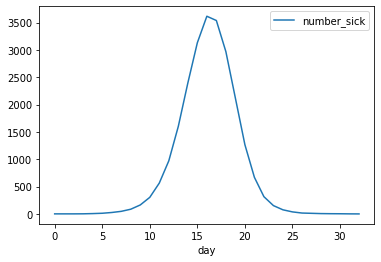

In [13]:
fig = plt.figure()
ax = plt.gca()
fig = df.plot(kind='line', x='day', y='number_sick', ax=ax).get_figure()
plt.savefig('test.png', bbox_inches='tight')
plt.show()

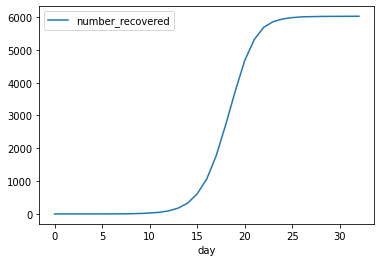

In [14]:
fig = plt.figure()
ax = plt.gca()
fig = df.plot(kind='line', x='day', y='number_recovered', ax=ax).get_figure()
plt.savefig('test.png', bbox_inches='tight')
plt.show()

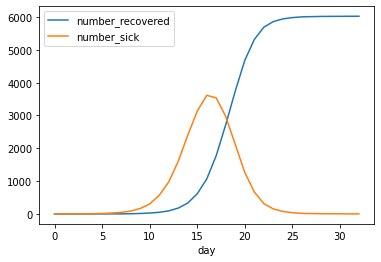

In [15]:
fig = plt.figure()
ax1 = plt.gca()
fig1 = df.plot(kind='line', x='day', y='number_recovered', ax=ax1).get_figure()
fig2 = df.plot(kind='line', x='day', y='number_sick', ax=ax1).get_figure()
plt.savefig('test.png')
plt.show()